In [190]:
import pandas as pd
import re

In [ ]:
# 1. 데이터 로드
phishing_df = pd.read_csv('init_phishing.csv', usecols=["Spam message"], encoding='cp949')
normal_df = pd.read_csv('generated_30k_ad_messages.csv', encoding='cp949')
chat_df = pd.read_csv('comments_1.csv', encoding='cp949')
chat_df = chat_df.sample(n=8000, random_state=42)
phishing_df = phishing_df.sample(n=7500, random_state=42) #25_05_16 -> 정상/스팸문자 데이터 비율 수정, 일반 대화 데이터 추가

In [192]:
phishing_df

,Spam message
33552,[Web발신]ifg@(광고)베리홉 [*+*] 연말 특가 ifg@증정 수량이 얼마 남...
9427,[Web발신]ifg@[연말까지 쭈욱~ 달려봅니다.]ifg@ifg@■ 내년 초 보험료...
199,[국외발신]ifg@제 큰 꼭지 시스터 존나 잘흔듬+line：df***
12447,[Web발신]ifg@(광고) [소노 스카이거너스 농구경기 초대권 증정]ifg@ifg...
39488,"[국제발신]ifg@***/**/E, 개미허리 교사 남편 집에 없어요 물 많이 나왔어..."
...,...
37738,[국제발신]ifg@항상 준비되어있는남자가 되는ifg@한알의?매운맛!!?비앤시ifg@...
14861,[Web발신]ifg@(광고)▶▶메리크리스마스!행복한 성탄절 되시기 바랍니다.ifg@...
6166,[Web발신]ifg@(광고)[LG전자 베스트샵]안녕하십니까 고객님ifg@LG전자 신...
35100,[Web발신]ifg@(광고)[SKT] T 멤버십 VIP 고객님 한정 TMAP 대리 ...


In [193]:
normal_df

,Message
0,[SK텔레콤] 2024년 T 멤버십 예상 등급을 안내드립니다. [Web발신] [SK...
1,[SK텔레콤] 유심보호서비스 가입을 안내드립니다. [Web발신] [농협은행] 유심보...
2,공기업·공공기관 취업전략 [Web발신] [경북대] 공기업·공공기관 취업전략 신청안내...
3,[고용노동부] 0플랜 슈퍼히어로 사용기간 만료 안내 [Web발신] [고용노동부] 0...
4,카드 배송원을 사칭한 보이스피싱 범죄에 주의해 주세요. [Web발신] [행정안전부]...
...,...
29995,[제주항공안내] [Web발신] [제주항공] 테더링(핫스팟)으로 사용 가능한 데이터를...
29996,원격 제어 앱을 이용한 피싱 범죄에 주의해 주세요. [Web발신] [GS칼텍스] 원...
29997,제목없음 [Web발신] <대학원생 직무교육: 반도체 및 미래자동차> 이번 주 꽃샘추...
29998,최신 피싱 범죄에 주의해 주세요. [Web발신] [한국수자원공사] 최신 피싱 범죄 ...


In [194]:
chat_df

,comment message
9752,시간 개순삭이다 ㅋㅋㅋ 두신들의 토론을 볼수있어서 좋았습니다
7465,무조건 메시
8622,스포츠는 메시 운동화는 조던
1775,16:21 보츠와나도 완전한 민주주의가 아니네
3465,자기들과 똑같은 생각을 강요하고 가만히 있는 사람 찾아가서 사상검증하는 나라 대한민...
...,...
10361,?@@강종훈-t7fㄹㅇ 조던은 펠레 알리는 물론이고 칼루이스 하다못해 같은 국적의 ...
4144,Four corners 얘기였죠. 만화에서는 Five corners.
4669,앗.. 타일러 ENTJ야?
1236,선우야....ㅋㅋㅋ 여기서 이말을 듣게 되다니


In [195]:
normal_df['message'] = normal_df['Message']
chat_df['message'] = chat_df['comment message']
normal_df = pd.concat([normal_df, chat_df], ignore_index=True)
normal_df = normal_df[['message']]

In [196]:
normal_df

,message
0,[SK텔레콤] 2024년 T 멤버십 예상 등급을 안내드립니다. [Web발신] [SK...
1,[SK텔레콤] 유심보호서비스 가입을 안내드립니다. [Web발신] [농협은행] 유심보...
2,공기업·공공기관 취업전략 [Web발신] [경북대] 공기업·공공기관 취업전략 신청안내...
3,[고용노동부] 0플랜 슈퍼히어로 사용기간 만료 안내 [Web발신] [고용노동부] 0...
4,카드 배송원을 사칭한 보이스피싱 범죄에 주의해 주세요. [Web발신] [행정안전부]...
...,...
37995,?@@강종훈-t7fㄹㅇ 조던은 펠레 알리는 물론이고 칼루이스 하다못해 같은 국적의 ...
37996,Four corners 얘기였죠. 만화에서는 Five corners.
37997,앗.. 타일러 ENTJ야?
37998,선우야....ㅋㅋㅋ 여기서 이말을 듣게 되다니


In [197]:
# 2. 메시지 컬럼 통일
phishing_df['message'] = phishing_df['Spam message']
normal_df['message'] = normal_df['message']

# 3. 라벨 지정 
phishing_df['label'] = 1 
normal_df['label'] = 0

# 4. 병합
combined_df = pd.concat([phishing_df, normal_df], ignore_index=True)

# 5. 필요한 컬럼만 유지
combined_df = combined_df[['message', 'label']]

combined_df

,message,label
0,[Web발신]ifg@(광고)베리홉 [*+*] 연말 특가 ifg@증정 수량이 얼마 남...,1
1,[Web발신]ifg@[연말까지 쭈욱~ 달려봅니다.]ifg@ifg@■ 내년 초 보험료...,1
2,[국외발신]ifg@제 큰 꼭지 시스터 존나 잘흔듬+line：df***,1
3,[Web발신]ifg@(광고) [소노 스카이거너스 농구경기 초대권 증정]ifg@ifg...,1
4,"[국제발신]ifg@***/**/E, 개미허리 교사 남편 집에 없어요 물 많이 나왔어...",1
...,...,...
45495,?@@강종훈-t7fㄹㅇ 조던은 펠레 알리는 물론이고 칼루이스 하다못해 같은 국적의 ...,0
45496,Four corners 얘기였죠. 만화에서는 Five corners.,0
45497,앗.. 타일러 ENTJ야?,0
45498,선우야....ㅋㅋㅋ 여기서 이말을 듣게 되다니,0


In [198]:
#6. 데이터 전처리
from konlpy.tag import Okt      #konlpy 라이브러리를 활용해 형태소 분석 및 불용어 제거를 추가하였음.
okt = Okt()                     

def clean_text(text):
    # 1) 한글, 공백 빼고 전부 제거 -> 25_05_16 링크가 있는 경우 무조건 스팸으로 분류되어 영어를 완전 제외함.
    text = re.sub(r'ifg@|\*+|[^가-힣\s]', '', text)
    return text.strip()

# 한국어 불용어 리스트 25_05_16 수정 https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a
stopwords = [
    '가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이',
    '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다',
    '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면',
    '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여',
    '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도',
    '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에',
    '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면',
    '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는',
    '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로',
    '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙',
    '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다',
    '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수',
    '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장',
    '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나',
    '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안',
    '된바에야', '된이상', '두번째로', '둘', '둥둥', '뒤따라', '뒤이어', '든간에', '들', '등',
    '등등', '딩동', '따라', '따라서', '따위', '따지지 않다', '딱', '때', '때가 되어', '때문에',
    '또', '또한', '뚝뚝', '라 해도', '령', '로', '로 인하여', '로부터', '로써', '륙', '를',
    '마음대로', '마저', '마저도', '마치', '막론하고', '만 못하다', '만약', '만약에', '만은 아니다',
    '만이 아니다', '만일', '만큼', '말하자면', '말할것도 없고', '매', '매번', '메쓰겁다', '몇',
    '모', '모두', '무렵', '무릎쓰고', '무슨', '무엇', '무엇때문에', '물론', '및', '바꾸어말하면',
    '바꾸어말하자면', '바꾸어서 말하면', '바꾸어서 한다면', '바꿔 말하면', '바로', '바와같이',
    '밖에 안된다', '반대로', '반대로 말하자면', '반드시', '버금', '보는데서', '보다더', '보드득',
    '본대로', '봐', '봐라', '부류의 사람들', '부터', '불구하고', '불문하고', '붕붕', '비걱거리다',
    '비교적', '비길수 없다', '비로소', '비록', '비슷하다', '비추어 보아', '비하면', '뿐만 아니라',
    '뿐만아니라', '뿐이다', '삐걱', '삐걱거리다', '사', '삼', '상대적으로 말하자면', '생각한대로',
    '설령', '설마', '설사', '셋', '소생', '소인', '솨', '쉿', '습니까', '습니다', '시각', '시간',
    '시작하여', '시초에', '시키다', '실로', '심지어', '아', '아니', '아니나다를가', '아니라면',
    '아니면', '아니었다면', '아래윗', '아무거나', '아무도', '아야', '아울러', '아이', '아이고',
    '아이구', '아이야', '아이쿠', '아하', '아홉', '안 그러면', '않기 위하여', '않기 위해서',
    '알 수 있다', '알았어', '앗', '앞에서', '앞의것', '야', '약간', '양자', '어', '어기여차',
    '어느', '어느 년도', '어느것', '어느곳', '어느때', '어느쪽', '어느해', '어디', '어때', '어떠한',
    '어떤', '어떤것', '어떤것들', '어떻게', '어떻해', '어이', '어째서', '어쨋든', '어쩔수 없다',
    '어찌', '어찌됏든', '어찌됏어', '어찌하든지', '언제', '언젠가', '얼마', '얼마 안 되는 것',
    '얼마간', '얼마나', '얼마든지', '얼마만큼', '얼마큼', '엉엉', '에', '에 가서', '에 달려 있다',
    '에 대해', '에 있다', '에 한하다', '에게', '에서', '여', '여기', '여덟', '여러분', '여보시오',
    '여부', '여섯', '여전히', '여차', '연관되다', '연이서', '영', '영차', '옆사람', '예',
    '예를 들면', '예를 들자면', '예컨대', '예하면', '오', '오로지', '오르다', '오자마자', '오직',
    '오호', '오히려', '와', '와 같은 사람들', '와르르', '와아', '왜', '왜냐하면', '외에도',
    '요만큼', '요만한 것', '요만한걸', '요컨대', '우르르', '우리', '우리들', '우선', '우에 종합한것과같이',
    '운운', '월', '위에서 서술한바와같이', '위하여', '위해서', '윙윙', '육', '으로', '으로 인하여',
    '으로서', '으로써', '을', '응', '응당', '의', '의거하여', '의지하여', '의해', '의해되다',
    '의해서', '이', '이 되다', '이 때문에', '이 밖에', '이 외에', '이 정도의', '이것', '이곳',
    '이때', '이라면', '이래', '이러이러하다', '이러한', '이런', '이럴정도로', '이렇게 많은 것',
    '이렇게되면', '이렇게말하자면', '이렇구나', '이로 인하여', '이르기까지', '이리하여', '이만큼',
    '이번', '이봐', '이상', '이어서', '이었다', '이와 같다', '이와 같은', '이와 반대로', '이와같다면',
    '이외에도', '이용하여', '이유만으로', '이젠', '이지만', '이쪽', '이천구', '이천육', '이천칠',
    '이천팔', '인 듯하다', '인젠', '일', '일것이다', '일곱', '일단', '일때', '일반적으로',
    '일지라도', '임에 틀림없다', '입각하여', '입장에서', '잇따라', '있다', '자', '자기', '자기집',
    '자마자', '자신', '잠깐', '잠시', '저', '저것', '저것만큼', '저기', '저쪽', '저희', '전부',
    '전자', '전후', '점에서 보아', '정도에 이르다', '제', '제각기', '제외하고', '조금', '조차',
    '조차도', '졸졸', '좀', '좋아', '좍좍', '주룩주룩', '주저하지 않고', '줄은 몰랏다', '줄은모른다',
    '중에서', '중의하나', '즈음하여', '즉', '즉시', '지든지', '지만', '지말고', '진짜로',
    '쪽으로', '차라리', '참', '참나', '첫번째로', '쳇', '총적으로', '총적으로 말하면',
    '총적으로 보면', '칠', '콸콸', '쾅쾅', '쿵', '타다', '타인', '탕탕', '토하다', '통하여',
    '툭', '퉤', '틈타', '팍', '팔', '퍽', '펄렁', '하', '하게될것이다', '하게하다', '하겠는가',
    '하고 있다', '하고있었다', '하곤하였다', '하구나', '하기 때문에', '하기 위하여', '하기는한데',
    '하기만 하면', '하기보다는', '하기에', '하나', '하느니', '하는 김에', '하는 편이 낫다',
    '하는것도', '하는것만 못하다', '하는것이 낫다', '하는바', '하더라도', '하도다', '하도록시키다',
    '하도록하다', '하든지', '하려고하다', '하마터면', '하면 할수록', '하면된다', '하면서',
    '하물며', '하여금', '하여야', '하자마자', '하지 않는다면', '하지 않도록', '하지마', '하지마라',
    '하지만', '하하', '한 까닭에', '한 이유는', '한 후', '한다면', '한다면 몰라도', '한데',
    '한마디', '한적이있다', '한켠으로는', '한항목', '할 따름이다', '할 생각이다', '할 줄 안다',
    '할 지경이다', '할 힘이 있다', '할때', '할만하다', '할망정', '할뿐', '할수있다', '할수있어',
    '할줄알다', '할지라도', '할지언정', '함께', '해도된다', '해도좋다', '해봐요', '해서는 안된다',
    '해야한다', '해요', '했어요', '향하다', '향하여', '향해서', '허', '허걱', '허허', '헉',
    '헉헉', '헐떡헐떡', '형식으로 쓰여', '혹시', '혹은', '혼자', '훨씬', '휘익', '휴', '흐흐', '흥',
    '힘입어'
]


# 형태소 분석 및 불용어 제거 함수
def tokenize_and_filter(text):
    tokens = okt.morphs(text, stem=True)  # 형태소 분석 + 원형 복원
    filtered = [word for word in tokens if word not in stopwords and len(word) > 1]
    return ' '.join(filtered)

import swifter
swifter.set_defaults(display_progress=True)
swifter.set_defaults(allow_dask_on_strings=False)

combined_df['message'] = (
    combined_df['message']
    .astype(str)
    .swifter.apply(lambda x: tokenize_and_filter(clean_text(x))) #Swifter를 활용한 병렬처리로 전처리 시간 향상 
)

combined_df[['message', 'label']].to_csv('combined_messages_cleand_20250516.csv', index=False, header=True, encoding='utf-8-sig')

Pandas Apply:   0%|          | 0/45500 [00:00<?, ?it/s]

In [199]:
combined_df

,message,label
0,발신 광고 베리 연말 증정 수량 남지 않다 서두르다 굿바이 베스트 리프 콜라겐 앰플...,1
1,발신 연말 쭈욱 달다 보다 내년 보험료 환급 예상 금리 인하 여파 생보 업계 긴장 ...,1
2,국외 신제 크다 꼭지 시스터 존나 잘흔듬,1
3,발신 광고 스카이 거너 농구 경기 초대권 증정 일요일 대명 레디 주년 생일 파티 초...,1
4,국제 발신 개미 허리 교사 남편 없다 많이 나오다 도와주다 오다,1
...,...,...
45495,강종훈 조던 펠레 알리다 이고 칼루이스 하다못해 국적 스포츠 고트인 웨인 그레츠키 ...,0
45496,얘기 이다 만화 에서는,0
45497,타일러,0
45498,선우 듣다 되다,0


In [200]:
from sklearn.model_selection import train_test_split

X = combined_df['message']
y = combined_df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [201]:
X_train

34815    텔레콤 멤버십 예상 등급 드리다 발신 티웨이항공 멤버십 예상 등급 안내 고객 안녕하...
30668    플러스 포인트 소멸 예정 안내 발신 플러스 포인트 소멸 예정 안내 소멸 예정 플러스...
39275                                          민주주의 정답 아니다
11185    상주 캠퍼스 학생 포트폴리오 특강 발신 프로그램 학생 성공 포트폴리오 특강 일월 대...
15989    발신 최근 경찰청 발표 자료 따르다 월간 발생 보이스피싱 전체 피해 동기간 대비 증...
                               ...                        
21158    발신 현대 자동차 데이터 혜택 안내 장기 우수 고객 안녕하다 텔레콤 믿다 이용 하다...
9951     텔레콤 멤버십 예상 등급 드리다 발신 환경부 멤버십 예상 등급 안내 고객 안녕하다 ...
2873     발신 광고 라이브 라이브 우수 고객 드리다 파격 혜택 가전 역시 국가대표 쇼핑 축제...
42682                      조던 펠레 비교 하고 메시 르브론 이랑 비교 하다 재밌다
32817    텔레콤 하다 데이터 가다 무료 제공 되다 발신 현대 백화점 데이터 무료 제공 안내 ...
Name: message, Length: 36400, dtype: object

In [202]:
y_train

34815    0
30668    0
39275    0
11185    0
15989    0
        ..
21158    0
9951     0
2873     1
42682    0
32817    0
Name: label, Length: 36400, dtype: int64

[[7531   69]
 [  66 1434]]
Accuracy: 0.9851648351648352
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7600
           1       0.95      0.96      0.96      1500

    accuracy                           0.99      9100
   macro avg       0.97      0.97      0.97      9100
weighted avg       0.99      0.99      0.99      9100



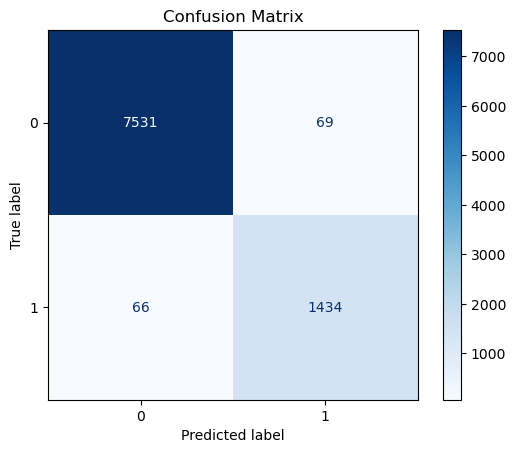

In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# TF-IDF 벡터화
#25_05_16 수정 -> n-gram 사용으로 한 단어만이 아닌, 두 단어를 인식까지 추가 / 문맥 유추 튜닝
vectorizer = TfidfVectorizer(max_features=15000)  # 가장많이 출현된 상위 단어 15000개
X_train_vec = vectorizer.fit_transform(X_train)  #벡터화 문자 -> 숫자
X_test_vec = vectorizer.transform(X_test)

# 모델 학습
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 예측
y_pred = model.predict(X_test_vec)

# 평가
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt

# y_test: 실제 레이블, y_pred: 예측 레이블
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [288]:
import numpy as np
#25_05_16 수정 -> 
#문장이 긴 경우 단어 빈도 횟수 증가하여
#확률곱 편향이 발생할 수 있는걸 발견함.
#로그 확률을 구한 뒤 문장 길이로 나누어 정규화함.  

def predict_message(message):
    if (len(message) < 10):
        return "입력 텍스트가 너무 짧습니다."
    # 벡터화
    message_vec = vectorizer.transform([message])
    
    # 나이브 베이즈 내부 로그 확률 (각 클래스별 단어별 로그 확률)
    log_probs = model.feature_log_prob_
    
    indices = message_vec.indices
    counts = message_vec.data
    
    class_log_likelihoods = []
    for class_idx in range(len(model.classes_)):
        log_likelihood = 0
        for i, idx in enumerate(indices):
            log_likelihood += counts[i] * log_probs[class_idx, idx]
        class_log_likelihoods.append(log_likelihood)
    
    length = np.sum(counts)
    if length == 0:
        return "입력 텍스트가 너무 짧습니다."
    
    avg_log_likelihoods = np.array(class_log_likelihoods) / length
    
    class_log_prior = np.log(model.class_count_ / model.class_count_.sum())
    
    scores = class_log_prior + avg_log_likelihoods
    
    exp_scores = np.exp(scores - np.max(scores))
    probs = exp_scores / exp_scores.sum()
    
    spam_prob = probs[model.classes_.tolist().index(1)]
    print( f"스팸 확률 {spam_prob:.2%} \n50 넘을시 1, 40~50구간 의심, 40미만 0")

    if(spam_prob < 0.4):
        return f"해당 문자는 정상 문자일 확률이 높습니다."
    elif(spam_prob < 0.5):
        return f"해당 문자는 스팸 문자일 경우가 의심됩니다. 주의를 요망합니다."
    else:
        return f"해당 문자는 스팸 문자일 경우가 거의 확실합니다!!!"

def preprocess_user_input(user_input):  # 유저 입력 전처리 함수
    cleaned = clean_text(user_input)
    tokenized = tokenize_and_filter(cleaned)
    return tokenized


# 3. 사용자로부터 입력 받기
user_input = input("문자를 입력하세요: ")
processed_input = preprocess_user_input(user_input)

print(user_input)
print("전처리 결과:", processed_input)
print(predict_message(processed_input))

[Web발신]ifg@(광고) 이명숙님, [뉴케어 혈압플랜] 깜짝 특가 소식을 알려드려요! 지금 특가로 구매해 보세요.ifg@ifg@◈ 뉴케어 혈압플랜 [**%] 특가ifg@  - 고혈압 관리를 위한 영양 설계ifg@  - 한 팩 당 ***원 초/특/가ifg@  └**,OOO원 → ★**,*OO원★ifg@    ▷https://vo.la/WrRngXifg@ifg@◈ 마이키즈의 크리스마스 선물ifg@  - 뉴케어 마이키즈+건강기능식품ifg@  - 최대 **% 할인과 성탄절 선물까지ifg@  └소원 남기면, *만원 상품권 드려요!ifg@    ▷https://vo.la/epSgCjifg@ifg@◈ 것시스 홀리데이 이벤트ifg@  - 다이어트 유산균 최대 **%▼ifg@  - 포토리뷰 적립금 최대 *천원ifg@  └전용 쇼핑백 *OO% 증정! ifg@    ▷https://vo.la/yIYfXtifg@ifg@◈ KB 손해보험 가입 이벤트ifg@  - *만원대 월 보험료ifg@  - 뉴케어X치매플랜 가입 시ifg@  └적립금 최대 *O,OOO원!ifg@    ▷https://vo.la/zfksLxifg@ifg@KB손해보험 준법감시인 심의필 제****-****호(****.**.**~****.**.**)ifg@ifg@*이 메세지는 전일자 기준 마케팅 수신 동의 고객님께 발송되었습니다.ifg@ifg@[대상웰라이프 본사쇼핑몰]ifg@고객센터 ***-***-****ifg@무료수신거부 **********
전처리 결과: 발신 광고 이명숙 케어 혈압 플랜 깜짝 소식 알다 드리다 지금 특가 구매 하다 보다 케어 혈압 플랜 고혈압 관리 영양 설계 하다 초특 마이 키즈 크리스마스 선물 케어 마이키 건강 기능 식품 최대 할인 성탄절 선물 소원 남다 만원 상품권 드리다 시스 홀리데이 이벤트 다이어트 유산균 최대 포토 리뷰 적립금 최대 천원 전용 쇼핑 증정 손해 보험 가입 이벤트 만원 보험료 케어 치매 플랜 가입 적립금 최대 손해 보험 준법 감시인 심의 제호 메세지 일자 기준 마케팅 수신 동의